Reference: https://towardsdatascience.com/finding-shortest-path-using-q-learning-algorithm-1c1f39e89505

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
%matplotlib inline

In [2]:
'''
edges1 = [(0,4), (4,0), (0,3),(3,0),(1,2),(2,1),(1,4),(4,1),(1,8),(8,1),(1,9),(9,1),(2,3),(3,2),(2,6),(6,2),(1,5),(5,1),(2,5), (5,2),(5,6),(6,5),(7,8),(8,7),(7,5),(5,7),(8,9),(9,8),(8,10),(10,8),(9,10),(10,9)]
edges_ = [(7,14),(14,7),(8,15),(15,8),(9,16),(16,9),(16,17),(17,16),(14,15),(15,14),(15,16),(16,15),(17,18),(18,17),
         (18,1),(1,18),(1,20),(20,1),(20,21),(21,20),(18,19),(19,18),(19,21),(21,19),(21,10),(10,21),(21,22),(22,21),
         (22,11),(11,22),(22,24),(24,22),(24,23),(23,24),(23,12),(12,23),(24,26),(26,24),(26,27),(27,26),(26,25),(25,26),
         (25,3),(3,25),(3,28),(28,3),(28,26),(26,28),(26,30),(30,26),(28,30),(30,28),(30,29),(29,30),(30,33),(33,30),
         (33,13),(13,33),(33,32),(32,33),(4,32),(32,4),(32,5),(5,32),(31,32),(32,31),(31,6),(6,31),(2,20),(20,2)]
'''

'\nedges1 = [(0,4), (4,0), (0,3),(3,0),(1,2),(2,1),(1,4),(4,1),(1,8),(8,1),(1,9),(9,1),(2,3),(3,2),(2,6),(6,2),(1,5),(5,1),(2,5), (5,2),(5,6),(6,5),(7,8),(8,7),(7,5),(5,7),(8,9),(9,8),(8,10),(10,8),(9,10),(10,9)]\nedges_ = [(7,14),(14,7),(8,15),(15,8),(9,16),(16,9),(16,17),(17,16),(14,15),(15,14),(15,16),(16,15),(17,18),(18,17),\n         (18,1),(1,18),(1,20),(20,1),(20,21),(21,20),(18,19),(19,18),(19,21),(21,19),(21,10),(10,21),(21,22),(22,21),\n         (22,11),(11,22),(22,24),(24,22),(24,23),(23,24),(23,12),(12,23),(24,26),(26,24),(26,27),(27,26),(26,25),(25,26),\n         (25,3),(3,25),(3,28),(28,3),(28,26),(26,28),(26,30),(30,26),(28,30),(30,28),(30,29),(29,30),(30,33),(33,30),\n         (33,13),(13,33),(33,32),(32,33),(4,32),(32,4),(32,5),(5,32),(31,32),(32,31),(31,6),(6,31),(2,20),(20,2)]\n'

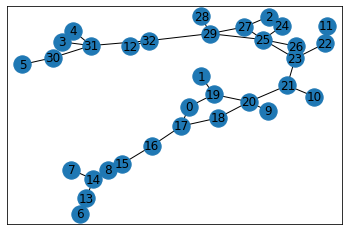

In [3]:
edges = [(6,13),(13,6),(7,14),(14,7),(8,15),(15,8),(15,16),(16,15),(13,14),(14,13),(14,15),(15,14),(16,17),(17,16),
         (17,0),(0,17),(0,19),(19,0),(19,20),(20,19),(17,18),(18,17),(18,20),(20,18),(20,9),(9,20),(20,21),(21,20),
         (21,10),(10,21),(21,23),(23,21),(23,22),(22,23),(22,11),(11,22),(23,25),(25,23),(25,26),(26,25),(25,24),(24,25),
         (24,2),(2,24),(2,27),(27,2),(27,25),(25,27),(25,29),(29,25),(27,29),(29,27),(29,28),(28,29),(29,32),(32,29),
         (32,12),(12,32),(32,31),(31,32),(3,31),(31,3),(31,4),(4,31),(30,31),(31,30),(30,5),(5,30),(1,19),(19,1)]         
g = nx.Graph()
g.add_edges_from(edges)
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g,pos)
nx.draw_networkx_edges(g,pos)
nx.draw_networkx_labels(g,pos)
plt.show()


In [4]:
# Intitialize Reward Matrix
r = np.matrix(np.zeros(shape = (33,33)))
for x in g[26]:
  r[x,26] = 100


In [5]:
q = np.matrix(np.zeros(shape = (33,33)))
q-=100
for node in g.nodes:
  for x in g[node]:
    q[node,x]=0
    q[x,node]=0

In [6]:
import pandas as pd
pd.DataFrame(r)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
pd.DataFrame(q)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0
4,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0
5,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0
6,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
9,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0


In [8]:
def next_number(start,er):
  random_value = random.uniform(0,1)
  if random_value < er:
    sample= g[start]
  else:
    sample = np.where(q[start,] == np.max(q[start]))[1]
  next_node = int(np.random.choice(sample,1))
  return next_node


In [9]:
def updateQ(node1,node2,lr,discount):
  max_index = np.where(q[node2,]==np.max(q[node2,]))[1]
  if max_index.shape[0]>1:
    max_index = int(np.random.choice(max_index, size = 1))
  else:
    max_index = int(max_index)
  max_value = q[node2,max_index]
  q[node1,node2] = int((1-lr)*q[node1,node2]+lr*(r[node1,node2]+discount*max_value))
  

In [10]:
def learn(er,lr,discount):
  for i in range(50000):
    start = np.random.randint(0,33)
    next_node = next_number(start,er)
    updateQ(start,next_node,lr,discount)

learn(0.5,0.8,0.8)


In [11]:
pd.DataFrame(q)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,69.0,-100.0,87.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,87.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,174.0,-100.0,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,110.0,-100.0
4,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,110.0,-100.0
5,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,87.0,-100.0,-100.0
6,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,26.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,33.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,42.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
9,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,110.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0


In [12]:
def shortest_path(begin, end):
  path = [begin]
  next_node = np.argmax(q[begin,])
  path.append(next_node)
  while next_node != end:
    next_node = np.argmax(q[next_node,])
    path.append(next_node)
  return path

In [13]:
shortest_path(0,26)

[0, 19, 20, 21, 23, 25, 26]

In [14]:
shortest_path(6,26)

[6, 13, 14, 15, 16, 17, 18, 20, 21, 23, 25, 26]

In [15]:
shortest_path(27,26)

[27, 25, 26]

In [16]:
shortest_path(28,26)

[28, 29, 25, 26]

In [17]:
shortest_path(3,26)

[3, 31, 32, 29, 25, 26]

In [18]:
shortest_path(5,26)

[5, 30, 31, 32, 29, 25, 26]

In [19]:
def get_shortest_path(origin_iot):
  map_names = {0:'R-A1',1:'R-B1',2:'R-C1',3:'R-D1', 4:'R-E1',5:'R-F1',6:'R-G1', 7:'R-H1', 8:'R-I1', 9:'R-M1', 10:'R-M2',
               11:'R-M3', 12:'R-N1', 13:'W-1',14:'W-2', 15:'W-3',16:'W-4',17:'W-5', 18:'W-6', 19:'W-7', 20: 'W-8',
               21:'W-9', 22:'W-10', 23:'W-11', 24:'W-12', 25:'W-13', 26:'W-14', 27:'W-15', 28:'W-16', 29:'W-17', 30:'W-18',
               31:'W-19', 32:'W-20'}
  res = []
  for key, value in map_names.items():
    if origin_iot == value:
      origin = key
  for n in shortest_path(origin,26):
    res.append(map_names[n])
  return res

my_path = get_shortest_path('W-15')
print(my_path)


['W-15', 'W-13', 'W-14']
